# Capstone I Preliminary EDA
7/15/2020

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

In [7]:
df = pd.read_csv('../data/processed/EdStatsAggregated.csv')

In [8]:
df.head(2)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1978,1979,1980,1981,1982,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,United States,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,NaN,NaN,NaN,NaN,NaN,...,31.982700,33.147579,33.628712,33.561531,32.421581,31.586950,30.963221,31.109060,28.698191,NaN
1,1,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,10587.285756,11695.55442,12597.66751,13993.166744,14438.976276,...,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969


In [9]:
# df.info()

In [10]:
df.shape

(36, 43)

In [11]:
# df = df.dropna(axis=1)
# df.shape

In [12]:
df = df.drop(['Unnamed: 0', 'Country Name'], axis=1)

In [13]:
df.head(1)

,Country Code,Indicator Name,Indicator Code,1978,1979,1980,1981,1982,1983,1984,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.9827,33.147579,33.628712,33.561531,32.421581,31.58695,30.963221,31.10906,28.698191,NaN


In [14]:
gdps = df[df['Indicator Code'] == 'NY.GDP.PCAP.CD']

In [15]:
primary_spend = df[df['Indicator Code'] == 'SE.XPD.PRIM.ZS']
primary_spend = primary_spend.dropna(axis=1)
primary_spend.head()

,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013
0,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,31.98270,33.147579,33.628712,33.561531,32.421581,31.586950,30.963221,31.109060
6,SWE,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,24.90185,25.046600,24.609659,24.074690,24.286600,24.259411,21.984011,22.379950
12,BRA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,32.02467,32.198582,31.919411,32.378811,31.325951,29.285561,28.894070,27.409750
18,DEU,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,14.73804,14.023630,13.497080,13.549030,13.482980,13.211040,12.810500,12.784330
24,CHE,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,29.23546,29.386419,25.301100,27.927629,27.969919,28.911150,29.332621,29.696461


In [16]:
gdps = gdps.drop(['Indicator Name', 'Indicator Code'], axis=1)

In [17]:
gdps = gdps.dropna(axis=1)
gdps.head()

,Country Code,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,USA,12597.667510,13993.166744,14438.976276,15561.426396,17134.286017,18269.422168,19115.052908,20100.858892,21483.233060,...,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969
7,SWE,16856.761086,15366.668591,13545.259119,12430.458931,12914.330682,13474.161346,17727.495334,21485.293869,24188.765945,...,46256.471601,53324.379372,55746.842381,46207.059203,52076.255913,59593.287112,57134.077068,60283.245223,59180.198978,50812.190860
13,BRA,1939.790876,2124.962989,2218.890515,1565.297832,1573.967139,1643.196503,1936.016335,2081.665262,2294.401695,...,5860.145975,7313.557962,8787.610375,8553.380470,11224.154083,13167.472892,12291.466852,12216.904464,12026.617310,8757.206202
19,DEU,12092.381854,10170.446275,9876.228232,9827.022409,9277.932299,9393.891691,13410.897100,16614.410104,17863.437897,...,36447.872318,41814.819097,45699.198323,41732.707253,41785.556913,46810.327959,44065.248908,46530.911428,48042.563435,41323.921502
25,CHE,18832.196719,17153.401316,17478.655793,17341.994876,16499.146931,16655.337392,23751.449517,29558.895478,31743.652912,...,57579.501954,63555.237500,72487.845930,69927.468770,74605.721021,88415.628061,83538.230078,85112.464398,86605.563376,82016.021313


In [18]:
list(gdps[::-1])

['Country Code',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [19]:
# gdps.set_index('Country Code', inplace=True)
g = gdps.T
g.shape

(37, 6)

In [20]:
# sns.pairplot(g)

In [21]:
g.corr(method='pearson')

""


In [22]:
# mask = np.triu(np.ones_like(g.corr()))
# sns.heatmap(g.corr(), mask=mask)

In [23]:
country_codes = ['USA', 'SWE', 'AUS', 'DEU', 'CHE', 'GBR']
for country in country_codes:
    print(country)

USA
SWE
AUS
DEU
CHE
GBR


In [24]:
gdps.iloc[0].describe()

count        37.000000
unique       37.000000
top       49790.665478
freq          1.000000
Name: 1, dtype: float64

In [25]:
# normal = stats.norm(gdps.iloc[0].mean(), gdps.iloc[0].std())

In [26]:
# fig, ax = plt.subplots(figsize=(12,8))
# x = np.linspace(0, gdps.iloc[0].max(), num=1000)
# ax.plot(x, normal.pdf(x))

In [27]:
df = pd.read_csv('../data/processed/EdStatsAggregated.csv')
df.head(1)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1978,1979,1980,1981,1982,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,United States,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,NaN,NaN,NaN,NaN,NaN,...,31.9827,33.147579,33.628712,33.561531,32.421581,31.58695,30.963221,31.10906,28.698191,NaN


In [28]:
codes = ['SE.XPD.TOTL.GD.ZS',
         'SE.XPD.PRIM.ZS',
         'SE.PRM.ENRL.TC.ZS',
         'SE.PRM.TCHR',
         'SL.TLF.ADVN.ZS',
         'NY.GDP.PCAP.CD']

for code in codes:
    df2 = df.copy()
    df2 = df2[df2['Indicator Code'] == code]
    df2 = df2.dropna(axis=1)

In [29]:
df2.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1980,1981,1982,1983,1984,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,1,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,12597.667510,13993.166744,14438.976276,15561.426396,17134.286017,...,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969
7,7,Sweden,SWE,GDP per capita (current US$),NY.GDP.PCAP.CD,16856.761086,15366.668591,13545.259119,12430.458931,12914.330682,...,46256.471601,53324.379372,55746.842381,46207.059203,52076.255913,59593.287112,57134.077068,60283.245223,59180.198978,50812.190860
13,13,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1939.790876,2124.962989,2218.890515,1565.297832,1573.967139,...,5860.145975,7313.557962,8787.610375,8553.380470,11224.154083,13167.472892,12291.466852,12216.904464,12026.617310,8757.206202
19,19,Germany,DEU,GDP per capita (current US$),NY.GDP.PCAP.CD,12092.381854,10170.446275,9876.228232,9827.022409,9277.932299,...,36447.872318,41814.819097,45699.198323,41732.707253,41785.556913,46810.327959,44065.248908,46530.911428,48042.563435,41323.921502
25,25,Switzerland,CHE,GDP per capita (current US$),NY.GDP.PCAP.CD,18832.196719,17153.401316,17478.655793,17341.994876,16499.146931,...,57579.501954,63555.237500,72487.845930,69927.468770,74605.721021,88415.628061,83538.230078,85112.464398,86605.563376,82016.021313


In [30]:
df2.corr()

,Unnamed: 0,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Unnamed: 0,1.000000,-0.271925,-0.397018,-0.375849,-0.369020,-0.450562,-0.481345,-0.328099,-0.248191,-0.260774,...,-0.339430,-0.317930,-0.243952,-0.210437,-0.215242,-0.149082,-0.183242,-0.189440,-0.184925,-0.189019
1980,-0.271925,1.000000,0.984502,0.968227,0.941034,0.910930,0.896741,0.969953,0.985319,0.990494,...,0.981426,0.992591,0.991781,0.970285,0.977947,0.971240,0.973747,0.980271,0.975781,0.949689
1981,-0.397018,0.984502,1.000000,0.992800,0.975983,0.962992,0.954951,0.989215,0.984761,0.988360,...,0.993634,0.993375,0.982195,0.968316,0.974040,0.955036,0.966564,0.970774,0.968295,0.958291
1982,-0.375849,0.968227,0.992800,1.000000,0.993148,0.979454,0.971145,0.997999,0.988730,0.988000,...,0.995791,0.988566,0.980657,0.980959,0.981302,0.960260,0.973888,0.974948,0.976290,0.978121
1983,-0.369020,0.941034,0.975983,0.993148,1.000000,0.992502,0.986217,0.994612,0.975670,0.971575,...,0.987470,0.972509,0.961540,0.971506,0.965192,0.937465,0.956319,0.956067,0.960898,0.976818
1984,-0.450562,0.910930,0.962992,0.979454,0.992502,1.000000,0.999031,0.978473,0.945943,0.942549,...,0.969372,0.948753,0.927186,0.935756,0.929138,0.892262,0.917735,0.917815,0.922630,0.947033
1985,-0.481345,0.896741,0.954951,0.971145,0.986217,0.999031,1.000000,0.969040,0.931698,0.928562,...,0.959505,0.936977,0.911613,0.919621,0.912734,0.872555,0.900239,0.900464,0.905316,0.932361
1986,-0.328099,0.969953,0.989215,0.997999,0.994612,0.978473,0.969040,1.000000,0.992510,0.990758,...,0.997086,0.989689,0.983661,0.986011,0.984405,0.964317,0.977894,0.979052,0.981201,0.985391
1987,-0.248191,0.985319,0.984761,0.988730,0.975670,0.945943,0.931698,0.992510,1.000000,0.999291,...,0.993202,0.993771,0.997063,0.995627,0.997192,0.987531,0.993828,0.995588,0.996051,0.988300
1988,-0.260774,0.990494,0.988360,0.988000,0.971575,0.942549,0.928562,0.990758,0.999291,1.000000,...,0.993122,0.995595,0.997715,0.991995,0.995714,0.986622,0.992422,0.994982,0.994142,0.982978


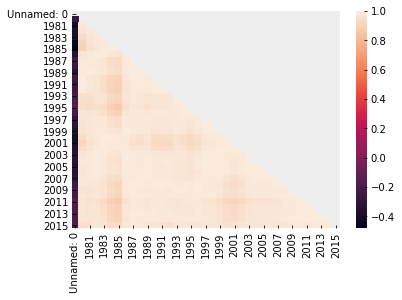

In [31]:
mask = np.triu(np.ones_like(df2.corr()))
sns.heatmap(df2.corr(), mask=mask)